<a href="https://colab.research.google.com/github/onlyabhilash/Transformers_with_NLP/blob/main/Performer/se3_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install se3-transformer-pytorch --upgrade

Requirement already up-to-date: se3-transformer-pytorch in /usr/local/lib/python3.6/dist-packages (0.0.15)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from se3_transformer_pytorch import SE3Transformer
from se3_transformer_pytorch.irr_repr import rot

torch.set_default_dtype(torch.float64) # works best in float64

zline = np.arange(0, 2, 0.05)
xline = np.sin(zline * 2 * np.pi) 
yline = np.cos(zline * 2 * np.pi)
points = np.array([xline, yline, zline])
geom = torch.tensor(points.transpose())[None,:].double()
feat = torch.randint(0, 20, (1, geom.shape[1],1)).double()

transformer = SE3Transformer(
    dim = 1,
    depth = 3,
    input_degrees = 1,
    num_degrees = 2,
    output_degrees = 2,
    reduce_dim_out = True,
)

@torch.no_grad()
def model(geom,feat):
    return geom + transformer(feat, geom, return_type = 1)

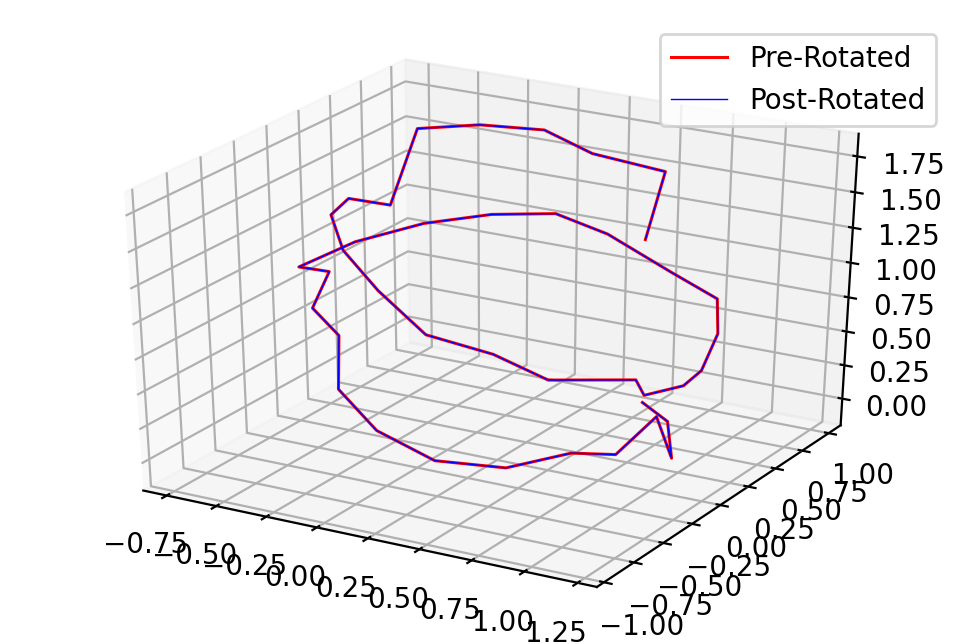

In [ ]:
# test rotation equivariance

Q = rot(*torch.randn(3)).double()
prerotated = model(geom @ Q, feat).squeeze().detach().numpy().transpose()
posrotated = (model(geom, feat) @ Q).squeeze().detach().numpy().transpose()

fig = plt.figure(dpi = 200)
ax = plt.axes(projection="3d")

ax.plot3D(prerotated[0], prerotated[1], prerotated[2], "r", linewidth=1.1)
ax.plot3D(posrotated[0], posrotated[1], posrotated[2], "b", linewidth=0.5)

plt.legend(["Pre-Rotated", "Post-Rotated"])
plt.show()

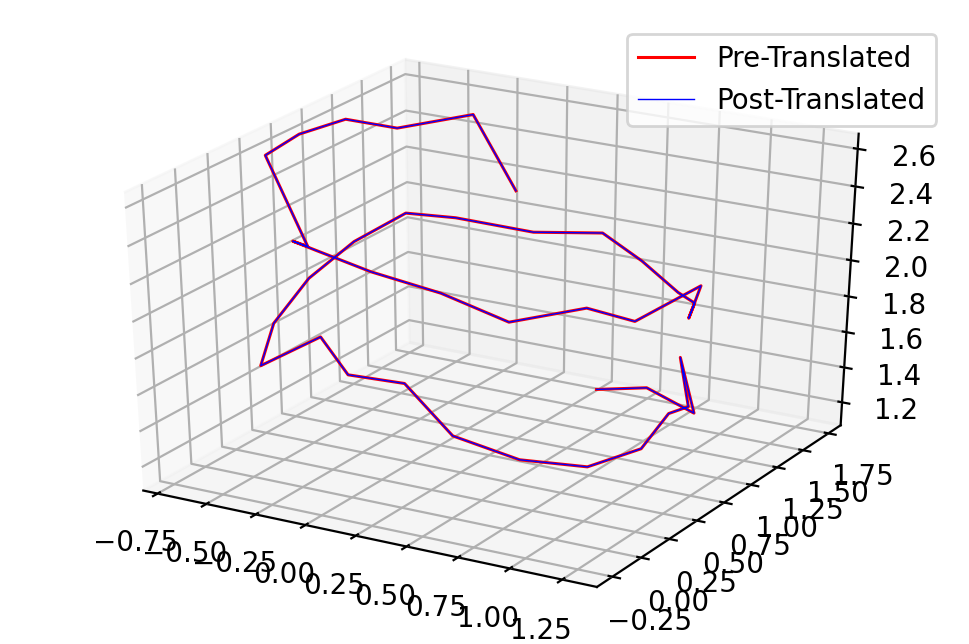

In [ ]:
 # check translation equivariance

x0 = 1*torch.rand(3)
prerotated = model(geom + x0, feat).squeeze().detach().numpy().transpose()
posrotated = (model(geom, feat) + x0).squeeze().detach().numpy().transpose()

fig = plt.figure(dpi = 200)
ax = plt.axes(projection="3d")

ax.plot3D(prerotated[0], prerotated[1], prerotated[2], "r", linewidth=1.1)
ax.plot3D(posrotated[0], posrotated[1], posrotated[2], "b", linewidth=0.5)

plt.legend(["Pre-Translated", "Post-Translated"])
plt.show()